In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
ma_test_res = pd.read_pickle("ma_test_res.pkl")
all_trades = pd.read_pickle("all_trades.pkl")

In [3]:
ma_test_res.head()

,pair,num_trades,total_gain,mean_gain,min_gain,max_gain,mashort,malong
0,GBP_USD,562,175.7,0.312633,-76.2,205.6,4,8
1,GBP_USD,306,-25.4,-0.083007,-86.7,224.8,4,16
2,GBP_USD,272,87.4,0.321324,-91.5,211.6,8,16
3,GBP_USD,206,-589.3,-2.860680,-112.2,217.6,4,32
4,GBP_USD,158,-1205.1,-7.627215,-120.8,204.4,8,32


In [4]:
ma_test_res.shape

(630, 8)

In [5]:
ma_test_res['pair'].unique()

array(['GBP_USD', 'GBP_CAD', 'GBP_JPY', 'GBP_NZD', 'GBP_CHF', 'EUR_GBP',
       'EUR_USD', 'EUR_CAD', 'EUR_JPY', 'EUR_NZD', 'EUR_CHF', 'USD_CAD',
       'USD_JPY', 'USD_CHF', 'CAD_JPY', 'CAD_CHF', 'NZD_USD', 'NZD_CAD',
       'NZD_JPY', 'NZD_CHF', 'CHF_JPY'], dtype=object)

630 是指可供交易的 21 個貨幣對與 6 個慢線，7 個快線的組合數 (注意到快線週期不能大於慢線週期) (21*30=630)   
8 指的是有每個組合有 8 筆資訊 (即 ```ma_res.py``` 的 ```res_ob``` 物件)

In [7]:
ma_test_res.columns

Index(['pair', 'num_trades', 'total_gain', 'mean_gain', 'min_gain', 'max_gain',
       'mashort', 'malong'],
      dtype='object')

In [8]:
ma_test_res = ma_test_res[ ['pair', 'num_trades', 'total_gain', 'mashort', 'malong'] ]

In [10]:
ma_test_res.head()

,pair,num_trades,total_gain,mashort,malong
0,GBP_USD,562,175.7,4,8
1,GBP_USD,306,-25.4,4,16
2,GBP_USD,272,87.4,8,16
3,GBP_USD,206,-589.3,4,32
4,GBP_USD,158,-1205.1,8,32


### 將快慢線組成統一名稱

這裡會使用 <font colo='red'> Pandas </font> 裡的 ```map()``` function，  
注意到 python 也有內建的 map 函數，  
但功能我看起來是差不多，就是將 ```map()``` 括號內參數的動作帶入

In [12]:
ma_test_res["CROSS"] = "MA_" + ma_test_res['mashort'].map(str) + "_" + ma_test_res['malong'].map(str)

In [14]:
ma_test_res.head()

,pair,num_trades,total_gain,mashort,malong,CROSS
0,GBP_USD,562,175.7,4,8,MA_4_8
1,GBP_USD,306,-25.4,4,16,MA_4_16
2,GBP_USD,272,87.4,8,16,MA_8_16
3,GBP_USD,206,-589.3,4,32,MA_4_32
4,GBP_USD,158,-1205.1,8,32,MA_8_32


In [26]:
df_all_gains = ma_test_res.groupby(by="CROSS", as_index=False).sum()

In [27]:
df_all_gains.head()

,CROSS,num_trades,total_gain,mashort,malong
0,MA_16_128,1045,-9299.8,336,2688
1,MA_16_256,686,-8430.1,336,5376
2,MA_16_32,2823,376.9,336,672
3,MA_16_64,1635,-1322.6,336,1344
4,MA_16_96,1236,-2539.2,336,2016


因為 ```groupby()``` 的概念是根據原 data frame 的某一 column 重新排列資料，  
所以預設會將你用來重排的依據 (以此例為依據 ```CROSS```)作為 row 的名稱 (如下圖)  
如果想保留原先編號 (也就是數字編號)，就要加上 ```as_index``` 參數

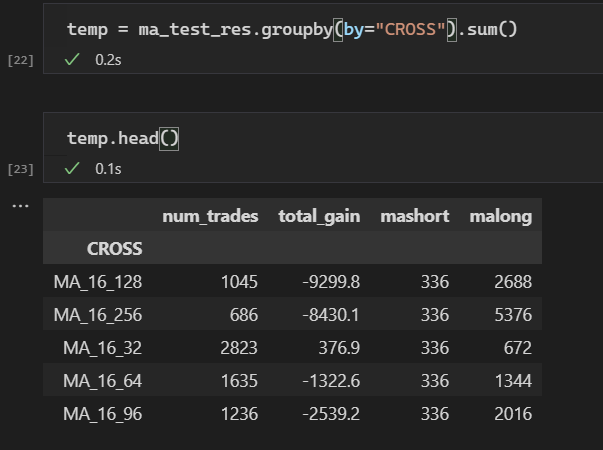

In [28]:
df_all_gains.head()

,CROSS,num_trades,total_gain,mashort,malong
0,MA_16_128,1045,-9299.8,336,2688
1,MA_16_256,686,-8430.1,336,5376
2,MA_16_32,2823,376.9,336,672
3,MA_16_64,1635,-1322.6,336,1344
4,MA_16_96,1236,-2539.2,336,2016


### 增加維度: 改為用 ```CROSS```、```mashort```、以及 ```malong``` 分類

In [29]:
df_all_gains = ma_test_res.groupby(by=['CROSS','mashort', 'malong'], as_index=False).sum()

In [30]:
df_all_gains.head(10)

,CROSS,mashort,malong,num_trades,total_gain
0,MA_16_128,16,128,1045,-9299.8
1,MA_16_256,16,256,686,-8430.1
2,MA_16_32,16,32,2823,376.9
3,MA_16_64,16,64,1635,-1322.6
4,MA_16_96,16,96,1236,-2539.2
5,MA_24_128,24,128,909,-7737.9
6,MA_24_256,24,256,576,-8951.0
7,MA_24_32,24,32,3205,-4112.6
8,MA_24_64,24,64,1421,1051.3
9,MA_24_96,24,96,1083,-3934.6


### 依照損益排序

In [32]:
df_all_gains.sort_values(by='total_gain', ascending=False, inplace=True)

In [34]:
df_all_gains.head(10) # 可以看到 30 種 MA 組合中只有 7 種組合帶來正報酬

,CROSS,mashort,malong,num_trades,total_gain
25,MA_8_16,8,16,5761,3044.3
27,MA_8_32,8,32,3156,3033.9
18,MA_4_64,4,64,2635,1992.0
8,MA_24_64,24,64,1421,1051.3
15,MA_4_16,4,16,6537,828.0
12,MA_32_64,32,64,1384,808.7
17,MA_4_32,4,32,4041,511.1
2,MA_16_32,16,32,2823,376.9
28,MA_8_64,8,64,1993,-72.7
19,MA_4_8,4,8,11775,-622.7


### 抓出表現最好的 MA 組合觀察

In [38]:
ma_8_16 = ma_test_res[ ma_test_res['CROSS'] == 'MA_8_16'].copy()

In [39]:
# 找出策略每筆交易的狀況
ma_8_16.sort_values(by='total_gain', ascending=False, inplace=True)

In [40]:
ma_8_16.head()

,pair,num_trades,total_gain,mashort,malong,CROSS
212,EUR_CAD,259,1244.9,8,16,MA_8_16
512,NZD_CAD,257,625.9,8,16,MA_8_16
422,CAD_JPY,267,573.4,8,16,MA_8_16
272,EUR_NZD,277,547.4,8,16,MA_8_16
602,CHF_JPY,279,507.6,8,16,MA_8_16


### 計算損益為正的機率

In [41]:
profit_p = ma_8_16[ ma_8_16['total_gain'] > 0]

In [49]:
pos = profit_p.shape[0]
pos
# 共有 15 組貨幣對可以帶來正報酬

15

In [46]:
all_pair_count = len(ma_8_16['pair'].unique())
all_pair_count

21

In [51]:
prob = pos / all_pair_count
prob

# 這代表在 8 MA+16 MA 的組合裡，有約 70% 的商品可以獲利

0.7142857142857143

### 延伸: 對所有 MA 組合計算勝率

In [59]:
for cross in df_all_gains['CROSS'].unique():
    # create a temporary data frame
    df_temp = ma_test_res[ ma_test_res['CROSS'] == cross]
    
    # total_p 存放該 MA 組合的交易商品總數
    total_p = df_temp.shape[0]

    # profit_p 存放該 MA 組合  正損益  的交易商品總數
    profit_p = df_temp[ df_temp['total_gain'] > 0 ].shape[0]
    
    # 印出相關資訊
    ## 大括號裡的 12 代表留 12 個字元的空間
    print(f"{cross:12} {profit_p:4} {(profit_p/total_p)*100:4.0f}%")

MA_8_16        15   71%
MA_8_32        15   71%
MA_4_64        13   62%
MA_24_64       13   62%
MA_4_16        11   52%
MA_32_64       11   52%
MA_4_32        14   67%
MA_16_32       12   57%
MA_8_64        10   48%
MA_4_8         10   48%
MA_16_64        8   38%
MA_4_96         9   43%
MA_8_96         8   38%
MA_16_96        8   38%
MA_32_96        7   33%
MA_24_96        8   38%
MA_24_32        7   33%
MA_4_128        7   33%
MA_64_128       3   14%
MA_32_128       7   33%
MA_8_128        5   24%
MA_24_128       7   33%
MA_16_256       4   19%
MA_8_256        4   19%
MA_64_96        4   19%
MA_24_256       6   29%
MA_16_128       5   24%
MA_4_256        2   10%
MA_32_256       6   29%
MA_64_256       6   29%


可以發現完整觀察不同週期交易各種貨幣對的勝率，其中我們發現:  
- 似乎選週期 4 (即四小時圖)與其他長線搭配，勝率都不錯
- 長線週期選越大，感覺勝率越低